In [1]:
# Import Dependencies
import os
import pandas as pd
import requests
import json
import pprint
import matplotlib.pyplot as plt
import numpy as np
from config import (aqs_api_key)
from config import (email_address)

# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
sample_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass_data = []

In [2]:
# Create a DataFrame for California and pull carbon monoxide data from API
cali_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : California}

# Call to url
cali_response = requests.get(sample_data_url, params = cali_params).json()
cali_data.append(cali_response)

cali_df = pd.DataFrame(cali_data[0]["Data"])
cali_df.head()


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30
1,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30
2,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30
3,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30
4,06,013,1002,42101,1,38.006311,-121.641918,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,41860,"San Francisco-Oakland-Hayward, CA",2020-07-30


In [4]:
clean_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)


In [5]:
clean_cali_df.isnull().values.any()

True

In [19]:

# Filter out the 1-hour sample_duration and fix any null values
sample_duration = clean_cali_df["sample_duration"] == '8-HR RUN AVG END HOUR'
clean_cali_df= clean_cali_df[sample_duration]

clean_cali_df

#Groupby date and fix null values
group_cali = pd.DataFrame(clean_cali_df.groupby(['date_local', 'county']).mean().unstack())
group_cali.index

group_cali.head()

latitude                                                       \
county        Alameda     Butte Contra Costa    Fresno  Humboldt  Imperial   
date_local                                                                   
2020-01-01  37.783492  39.76168    37.967575  36.78538  40.77678  32.67618   
2020-01-02  37.783492  39.76168    37.967575  36.78538  40.77678  32.67618   
2020-01-03  37.783492  39.76168    37.967575  36.78538  40.77678  32.67618   
2020-01-04  37.783492  39.76168    37.967575  36.78538  40.77678  32.67618   
2020-01-05  37.783492  39.76168    37.967575  36.78538  40.77678  32.67618   

                                                        ...            aqi  \
county           Inyo Los Angeles     Marin   Monterey  ... San Bernardino   
date_local                                              ...                  
2020-01-01  37.360684   34.137227  37.97231  36.694261  ...       6.166667   
2020-01-02  37.360684   34.137227  37.97231  36.694261  ...       5.833333   
2020-01-03  37.360684   34.137227  37.97231  36.694261  ...       7.333333   
2020-01-04  37.360684   34.137227  37.97231  36.694261  ...       8.833333   
2020-01-05  37.360684   34.137227  37.97231  36.694261  ...       8.500000   

                                                                        \
county     San Diego San Francisco San Joaquin San Mateo Santa Barbara   
date_local                                                               
2020-01-01      10.0           7.0         5.0       6.0           2.0   
2020-01-02      11.0           8.0         6.0       9.0           2.0   
2020-01-03      13.5           7.0         7.0       9.0           3.5   
2020-01-04      13.0           6.0         7.0       9.0           3.5   
2020-01-05      12.5           5.0         7.0       6.0           2.0   

                                                 
county     Santa Clara Solano Sonoma Stanislaus  
date_local                                       
2020-01-01        11.0   11.0    7.0        5.0  
2020-01-02         9.5   14.0    6.0        5.0  
2020-01-03        14.0   17.0    7.0        7.0  
2020-01-04        11.5   10.0    8.0        7.0  
2020-01-05         8.5    9.0    7.0        3.0  

[5 rows x 192 columns]

In [7]:
list(group_cali.columns.values)

[('latitude', 'Alameda'),
 ('latitude', 'Butte'),
 ('latitude', 'Contra Costa'),
 ('latitude', 'Fresno'),
 ('latitude', 'Humboldt'),
 ('latitude', 'Imperial'),
 ('latitude', 'Inyo'),
 ('latitude', 'Los Angeles'),
 ('latitude', 'Marin'),
 ('latitude', 'Monterey'),
 ('latitude', 'Napa'),
 ('latitude', 'Orange'),
 ('latitude', 'Riverside'),
 ('latitude', 'Sacramento'),
 ('latitude', 'San Bernardino'),
 ('latitude', 'San Diego'),
 ('latitude', 'San Francisco'),
 ('latitude', 'San Joaquin'),
 ('latitude', 'San Mateo'),
 ('latitude', 'Santa Barbara'),
 ('latitude', 'Santa Clara'),
 ('latitude', 'Solano'),
 ('latitude', 'Sonoma'),
 ('latitude', 'Stanislaus'),
 ('longitude', 'Alameda'),
 ('longitude', 'Butte'),
 ('longitude', 'Contra Costa'),
 ('longitude', 'Fresno'),
 ('longitude', 'Humboldt'),
 ('longitude', 'Imperial'),
 ('longitude', 'Inyo'),
 ('longitude', 'Los Angeles'),
 ('longitude', 'Marin'),
 ('longitude', 'Monterey'),
 ('longitude', 'Napa'),
 ('longitude', 'Orange'),
 ('longitude', 

In [64]:
big_ones=clean_cali_df.nlargest(200, ["aqi"]) 
big_ones_group=pd.DataFrame(big_boys.groupby(['date_local', 'county']).mean().unstack())

In [65]:
cali_random=group_cali.sample(n=200, frac=None, replace=True, weights=None, random_state=None, axis=None)
print (cali_random)

             latitude                                                       \
county        Alameda     Butte Contra Costa    Fresno  Humboldt  Imperial   
date_local                                                                   
2020-02-10  37.783492  39.76168    37.967575  36.78538  40.77678       NaN   
2020-04-29        NaN       NaN          NaN       NaN       NaN       NaN   
2020-04-23        NaN       NaN          NaN       NaN       NaN       NaN   
2020-04-01        NaN       NaN          NaN       NaN  40.77678       NaN   
2020-01-04  37.783492  39.76168    37.967575  36.78538  40.77678  32.67618   
...               ...       ...          ...       ...       ...       ...   
2020-03-22        NaN       NaN          NaN       NaN  40.77678       NaN   
2020-05-01  37.783492       NaN    37.967575       NaN       NaN       NaN   
2020-01-11  37.783492  39.76168    37.967575  36.78538  40.77678  32.67618   
2020-03-09        NaN       NaN          NaN       NaN  40.77678

In [68]:
cali_merge_df = pd.merge(big_boy_group, cali_random, on=["observation_percent"], how="outer")

ValueError: The column label 'observation_percent' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

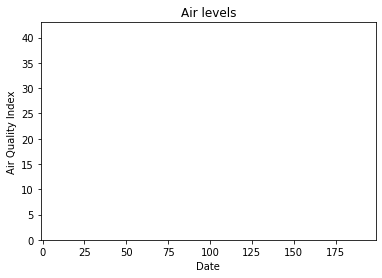

<BarContainer object of 200 artists>

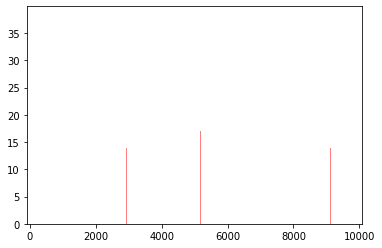

In [67]:
x_axis = big_boys.index

plt.title("Air levels")
plt.xlabel("Date")
plt.ylabel("Air Quality Index")

plt.xlim(-1.00, len(big_boys.index)-1)
plt.ylim(0, max(big_ones["aqi"]) + 5)

plt.bar(x_axis, (big_ones["aqi"]), facecolor="red", alpha=0.75, align="center")

plt.show()
plt.bar(x_axis, (big_ones["aqi"]), color='r', alpha=0.5, align="center")

In [41]:
# X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])
x_values = group_cali["date_local"]
y_values = group_cali["aqi"]
plt.scatter(x_values, y_values, color ='k', s=100 )
plt.xlabel("Date")
plt.ylabel('"Air Quality Index')
plt.show()

KeyError: 'date_local'

ValueError: x and y must be the same size

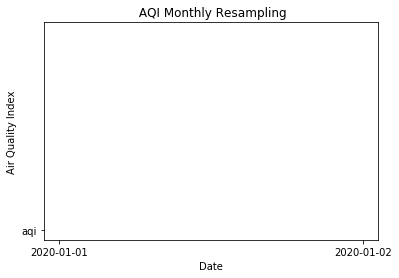

In [40]:
# fig, ax = plt.subplots(figsize=(18, 12))
# sns.lineplot(x='date_local', y='aqi', data=df, ax=ax)
# ax.set_title('AQI Monthly Resampling')
# ax.set_ylabel('Air Quality Index')
# ax.set_xlabel('Date')

x_axis =group_cali.index

plt.title(" AQI Monthly Resampling")
plt.xlabel("Date")
plt.ylabel("Air Quality Index")

plt.scatter(x_axis, "aqi", marker="o", color="red")
plt.show()
